In [7]:
# Import numpy, time, matplotlib, Keras models, backend, layers and utils
# set random seed using random.seed from numpy

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, SpatialDropout2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [8]:
# Import cifar10 from keras datasets
# Load CIFAR10 dataset from Keras datasets module seperately as train and test datasets
# Obtain number of training and testing examples, image dimensions and number of classes

from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


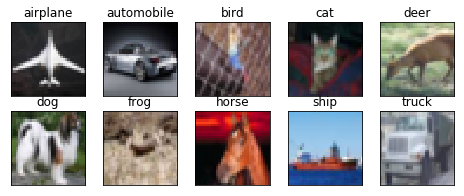

In [9]:
# Display images corresponding to each class from training dataset

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Define function to plot summarize history for accuracy and loss

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# Define function to calculate accuracy

def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
# Convert the Tensor i.e. train and test dataset to float tensors. Also perform a min-max normalization where min = 0 and max = 255
# # Convert 1-dimensional class arrays to num_classes-dimensional class matrices

train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### Design the network architecture (CNN) by following the below guidelines for CIFAR10 dataset

*   Design the network such that the final receptive field is around 64x64 / 72x72 for CIFAR 10 data set.
*   MaxPool is placed only after edges & gradients are created. This is when receptive reaches 7x7 or 9x9 for CIFAR10 data set

### Architecture type 1

+ Block1: 32 -- 64 -- 128 -- 128/256 --  MaxPool
+ Block2: 32 -- 64 -- 128 -- 128/256 --  MaxPool
+ Block3: 32 -- 64 -- 128  
+ Block4: 32 -- 64 -- 128 -- Softmax


### Architecture type 2

+ Block1: 32 -- 64 -- 128 -- 128/256 --  MaxPool
+ Block2: ====64 -- 128 -- 128/256 --  128/256/512 -- MaxPool
+ Block3: ========128 -- 128/256 --  128/256/512   
+ Block4: =============128/256 --  128/256/512 -- 128/256/512/1024 -- Softmax

#### Architecture type1

+ Block1: 32 -- 64 -- 128 -- 128/256 --  MaxPool
+ Block2: 32 -- 64 -- 128 -- 128/256 --  MaxPool
+ Block3: 32 -- 64 -- 128  
+ Block4: 32 -- 64 -- 128 -- Softmax

In [0]:
# Create a CNN model using Keras functions. Use relu for all layers, except at the end. The logits are passed into softmax layer to represent everything between 0 and 1
# L2 regularization of 1e-2 i.e. kernel regularization is used in all convolution layers. Image normalization is not used.

from keras.regularizers import l2


model = Sequential()
model.add(Convolution2D(32, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2), input_shape=(32, 32, 3))) #Input channel 3, number of filters 32, filter size is 3x3 with 3 channels. Receptive field is 3x3. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(64, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 64, filter size is 3x3 with 32 channels. Receptive field is 5x5. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 64, number of filters 128, filter size is 3x3 with 64 channels. Receptive field is 7x7. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 128, filter size is 3x3 with 128 channels. Receptive field is 9x9. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(32, 1, 1, use_bias=False, kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 32, filter size is 1x1 with 128 channels. Receptive field is 9x9. Output Images size 32. This is transition block.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(MaxPooling2D(pool_size=(2, 2))) #Input channel 32, number of filters n/a, filter size is n/a with n/a channels. Receptive field is 18x18. Output Images size 16. This is MaxPooling layer.


model.add(Convolution2D(32, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 32, filter size is 3x3 with 32 channels. Receptive field is 20x20. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(64, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 64, filter size is 3x3 with 32 channels. Receptive field is 22x22. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 64, number of filters 128, filter size is 3x3 with 64 channels. Receptive field is 24x24. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 128, filter size is 3x3 with 128 channels. Receptive field is 26x26. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(32, 1, 1, use_bias=False,  kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 32, filter size is 1x1 with 128 channels. Receptive field is 26x26. Output Images size 16. This is transition block.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(MaxPooling2D(pool_size=(2, 2))) #Input channel 32, number of filters n/a, filter size is n/a with n/a channels. Receptive field is 52x52. Output Images size 8. This is MaxPooling layer.


model.add(Convolution2D(32, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 32, filter size is 3x3 with 32 channels. Receptive field is 54x54. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(64, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 64, filter size is 3x3 with 32 channels. Receptive field is 56x56. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 64, number of filters 128, filter size is 3x3 with 64 channels. Receptive field is 58x58. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(32, 1, 1, use_bias=False,  kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 32, filter size is 1x1 with 128 channels. Receptive field is 58x58. Output Images size 8. This is transition block.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(32, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 32, filter size is 3x3 with 32 channels. Receptive field is 60x60. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(64, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 64, filter size is 3x3 with 32 channels. Receptive field is 62x62. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 64, number of filters 128, filter size is 3x3 with 64 channels. Receptive field is 64x64. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
#model.add(BatchNormalization()) # BatchNormalization layer
#model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(num_classes, 8, 8, use_bias=False,)) #Input channel 128, number of filters 10 i.e. num_classes, filter size is 8X8 with 128 channels.

model.add(Flatten()) #The outputs from the previous layer are flattened
model.add(Activation('softmax')) #Softmax activation layer.So that the values of logits are squished between 0 and 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), use_bias=False, kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), use_bias=False, kernel_regularizer=<keras.reg..., padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), use_bias=False, kernel_regularizer=<keras.reg..., padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), use_bias=False, kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/

In [0]:
# Compiles the model i.e. specify loss, type of optimizer to use while training, metrics that needs to be calculated and displayed.
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Displays the summary of the model i.e. gives the details of different shapes and channels in different layers of the model.

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 32, 32, 32)        864       
_________________________________________________________________
activation_113 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_93 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_98 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 32, 32, 64)        18432     
_________________________________________________________________
activation_114 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_94 (Batc (None, 32, 32, 64)        256       
__________

In [0]:
# Compiles the model i.e. specify loss, type of optimizer to use while training, metrics that needs to be calculated and displayed.

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 +  0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
# create a checkpoint to save the model when accuracy improves

from keras.callbacks import *
checkpoint = ModelCheckpoint('best_model_arch1.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [LearningRateScheduler(scheduler, verbose=1), checkpoint]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=195, epochs=80)`


Epoch 1/80

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
195/195 [==============================] - 49s 252ms/step - loss: 7.9644 - acc: 0.1112 - val_loss: 4.0691 - val_acc: 0.1000

Epoch 00001: val_acc improved from -inf to 0.10000, saving model to best_model_arch1.h5
Epoch 2/80

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
195/195 [==============================] - 40s 203ms/step - loss: 2.7992 - acc: 0.3221 - val_loss: 2.8490 - val_acc: 0.1449

Epoch 00002: val_acc improved from 0.10000 to 0.14490, saving model to best_model_arch1.h5
Epoch 3/80

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
195/195 [==============================] - 40s 205ms/step - loss: 1.9772 - acc: 0.4506 - val_loss: 2.7307 - val_acc: 0.2090

Epoch 00003: val_acc improved from 0.14490 to 0.20900, saving model to best_model_arch1.h5
Epoch 4/80

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
195/195 [=========

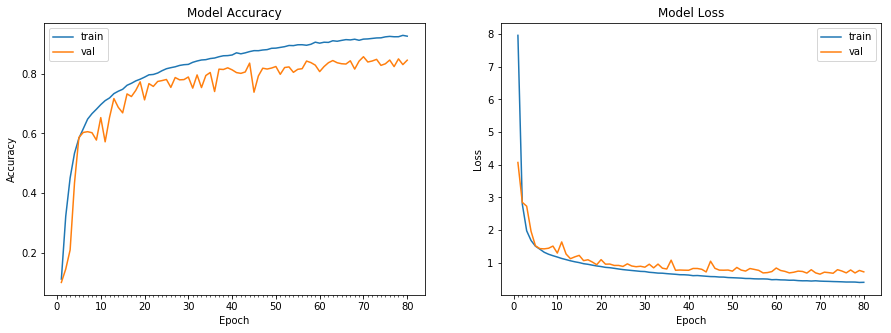

Accuracy on test data is: 84.54


In [0]:
# Train the model using fit_generator function. Also calculate and display total time taken for training. Along with this plot summarize history for accuracy and loss. Display accuracy on validation dataset.

from keras.preprocessing.image import ImageDataGenerator
from math import ceil

#datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zoom_range=0.0, horizontal_flip=False)

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)

#datagen.fit(train_features)

#validation_steps = ceil(len(test_features)/ 128)


# train the model
start = time.time()
# Train the model
# model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
#                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
#                                 validation_data = datagen.flow(test_features, test_labels, batch_size= 128, shuffle = False), validation_steps=validation_steps, verbose=1)

model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks = callbacks_list)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

*   Validation accuracy for best model is 85.70
*   Validation accuracy at the last epoch is 84.54

### Architecture type 2

#### SpatialDropout is used instead of Dropout

+ Block1: 32 -- 64 -- 128 -- 128/256 --  MaxPool
+ Block2: ====64 -- 128 -- 128/256 --  128/256/512 -- MaxPool
+ Block3: ========128 -- 128/256 --  128/256/512   
+ Block4: =============128/256 --  128/256/512 -- 128/256/512/1024 -- Softmax

In [13]:
# Create a CNN model using Keras functions. Use relu for all layers, except at the end. The logits are passed into softmax layer to represent everything between 0 and 1
# L2 regularization of 1e-2 i.e. kernel regularization is used in all convolution layers Image normalization is not used.

# SpatialDropout is considered instead of Dropout to perform better regularization.

from keras.regularizers import l2


model = Sequential()
model.add(Convolution2D(32, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2), input_shape=(32, 32, 3))) #Input channel 3, number of filters 32, filter size is 3x3 with 3 channels. Receptive field is 3x3. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(SpatialDropout2D(0.1)) # SpatialDropout is set to 0.1

model.add(Convolution2D(64, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 64, filter size is 3x3 with 32 channels. Receptive field is 5x5. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(SpatialDropout2D(0.1)) # SpatialDropout is set to 0.1


model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 64, number of filters 128, filter size is 3x3 with 64 channels. Receptive field is 7x7. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(SpatialDropout2D(0.1)) # SpatialDropout is set to 0.1


model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 128, filter size is 3x3 with 128 channels. Receptive field is 9x9. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(SpatialDropout2D(0.1)) # SpatialDropout is set to 0.1


model.add(Convolution2D(64, 1, 1, use_bias=False, kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 64, filter size is 1x1 with 128 channels. Receptive field is 9x9. Output Images size 32. This is transition block.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(SpatialDropout2D(0.1)) # SpatialDropout is set to 0.1

model.add(MaxPooling2D(pool_size=(2, 2))) #Input channel 64, number of filters n/a, filter size is n/a with n/a channels. Receptive field is 18x18. Output Images size 16. This is MaxPooling layer.


model.add(Convolution2D(64, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 64, number of filters 64, filter size is 3x3 with 64 channels. Receptive field is 20x20. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(SpatialDropout2D(0.1)) # SpatialDropout is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 64, number of filters 128, filter size is 3x3 with 64 channels. Receptive field is 22x22. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(SpatialDropout2D(0.1)) # SpatialDropout is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 128, filter size is 3x3 with 128 channels. Receptive field is 24x24. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(SpatialDropout2D(0.1)) # SpatialDropout is set to 0.1

model.add(Convolution2D(256, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 256, filter size is 3x3 with 128 channels. Receptive field is 26x26. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(SpatialDropout2D(0.1)) # SpatialDropout is set to 0.1

model.add(Convolution2D(128, 1, 1, use_bias=False,  kernel_regularizer=l2(1e-2))) #Input channel 256, number of filters 128, filter size is 1x1 with 256 channels. Receptive field is 26x26. Output Images size 16. This is transition block.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(SpatialDropout2D(0.1)) # SpatialDropout is set to 0.1

model.add(MaxPooling2D(pool_size=(2, 2))) #Input channel 128, number of filters n/a, filter size is n/a with n/a channels. Receptive field is 52x52. Output Images size 8. This is MaxPooling layer.


model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 128, filter size is 3x3 with 128 channels. Receptive field is 54x54. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(SpatialDropout2D(0.1)) # SpatialDropout is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 128, filter size is 3x3 with 128 channels. Receptive field is 56x56. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(SpatialDropout2D(0.1)) # SpatialDropout is set to 0.1


model.add(Convolution2D(256, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 256, filter size is 3x3 with 128 channels. Receptive field is 58x58. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(SpatialDropout2D(0.1)) # SpatialDropout is set to 0.1


model.add(Convolution2D(128, 1, 1, use_bias=False,  kernel_regularizer=l2(1e-2))) #Input channel 256, number of filters 128, filter size is 1x1 with 256 channels. Receptive field is 58x58. Output Images size 8. This is transition block.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(SpatialDropout2D(0.1)) # SpatialDropout is set to 0.1


model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 128, filter size is 3x3 with 128 channels. Receptive field is 60x60. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(SpatialDropout2D(0.1)) # SpatialDropout is set to 0.1

model.add(Convolution2D(256, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 256, filter size is 3x3 with 128 channels. Receptive field is 62x62. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(SpatialDropout2D(0.1)) # SpatialDropout is set to 0.1

model.add(Convolution2D(256, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 256, number of filters 256, filter size is 3x3 with 256 channels. Receptive field is 64x64. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
#model.add(BatchNormalization()) # BatchNormalization layer
#model.add(Dropout(0.1)) # SpatialDropout is set to 0.1


model.add(Convolution2D(num_classes, 8, 8, use_bias=False,)) #Input channel 256, number of filters 10 i.e. num_classes, filter size is 8X8 with 256 channels.

model.add(Flatten()) #The outputs from the previous layer are flattened
model.add(Activation('softmax')) #Softmax activation layer.So that the values of logits are squished between 0 and 1

W0628 08:40:33.823661 139849773148032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), use_bias=False, kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  
W0628 08:40:33.872742 139849773148032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 08:40:33.881168 139849773148032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0628 08:40:33.935837 139849773148032 deprec

In [14]:
# Compiles the model i.e. specify loss, type of optimizer to use while training, metrics that needs to be calculated and displayed.
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0628 08:40:43.118812 139849773148032 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [15]:
# Displays the summary of the model i.e. gives the details of different shapes and channels in different layers of the model.

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        864       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18432     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
__________

In [16]:
# Mount google drive into colab. This is to save snapshots of the model during training

from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
# Path to save the snapshots of the model

filepath="/content/gdrive/My Drive/best_model_arch2_{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"

In [0]:
# Compiles the model i.e. specify loss, type of optimizer to use while training, metrics that needs to be calculated and displayed.

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 +  0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
# create a checkpoint to save the model when accuracy improves

from keras.callbacks import *
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [LearningRateScheduler(scheduler, verbose=1), checkpoint]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=195, epochs=80)`
W0626 14:59:49.220164 139923118737280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future

Epoch 1/80

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
195/195 [==============================] - 58s 298ms/step - loss: 13.4137 - acc: 0.1268 - val_loss: 21.5285 - val_acc: 0.1001

Epoch 00001: val_acc improved from -inf to 0.10010, saving model to /content/gdrive/My Drive/best_model_arch2_001-val_acc:0.100.hdf5
Epoch 2/80

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
195/195 [==============================] - 50s 257ms/step - loss: 6.2569 - acc: 0.2377 - val_loss: 5.8196 - val_acc: 0.1158

Epoch 00002: val_acc improved from 0.10010 to 0.11580, saving model to /content/gdrive/My Drive/best_model_arch2_002-val_acc:0.116.hdf5
Epoch 3/80

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
195/195 [==============================] - 49s 250ms/step - loss: 4.8310 - acc: 0.2765 - val_loss: 3.8167 - val_acc: 0.1000

Epoch 00003: val_acc did not improve from 0.11580
Epoch 4/80

Epoch 00004: LearningRateScheduler settin

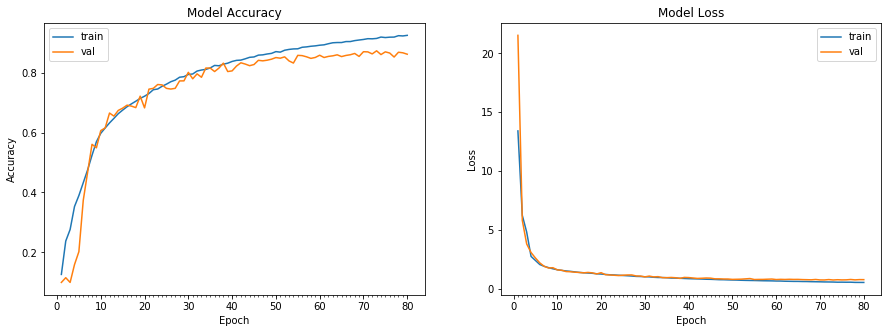

Accuracy on test data is: 86.12


In [14]:
# Train the model using fit_generator function. Also calculate and display total time taken for training. Along with this plot summarize history for accuracy and loss. Display accuracy on validation dataset.

from keras.preprocessing.image import ImageDataGenerator
from math import ceil

#datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zoom_range=0.0, horizontal_flip=False)

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)

#datagen.fit(train_features)

#validation_steps = ceil(len(test_features)/ 128)


# train the model
start = time.time()
# Train the model
# model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
#                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
#                                 validation_data = datagen.flow(test_features, test_labels, batch_size= 128, shuffle = False), validation_steps=validation_steps, verbose=1)

model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks = callbacks_list)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

*   Validation accuracy for best model is 87.25
*   Validation accuracy at the last epoch is 86.12

* Best saved model : /content/gdrive/My Drive/best_model_arch2_073-val_acc:0.873.hdf5

In [0]:
# Load the best saved model

from keras.models import load_model
saved_model = load_model('/content/gdrive/My Drive/best_model_arch2_073-val_acc:0.873.hdf5')


In [0]:
#Obtain predictions

y_pred = saved_model.predict(test_features)

In [96]:
# Print predictions and actual labels

print(y_pred[:9])
print(test_labels[:9])

[[2.6011005e-06 3.4172324e-05 9.2163118e-06 9.7272080e-01 6.6771372e-06
  2.6686974e-02 3.2551299e-04 7.2554881e-06 2.0213892e-04 4.7009512e-06]
 [1.8490519e-04 1.2187886e-03 4.0123304e-08 1.6667087e-07 2.8329627e-08
  1.9985450e-08 2.6733275e-07 4.4971554e-08 9.9852544e-01 7.0377275e-05]
 [2.5582723e-02 3.4960050e-02 9.2236096e-06 8.2874387e-05 5.2514715e-06
  3.1522220e-06 1.8928966e-06 5.3298201e-05 9.2068392e-01 1.8617615e-02]
 [9.5370817e-01 4.8246565e-03 1.9036044e-03 1.3081516e-03 1.0779316e-05
  7.8882753e-05 8.7593988e-05 4.6082827e-05 2.9888498e-02 8.1435647e-03]
 [3.1085347e-05 1.9108900e-04 2.9573732e-04 9.7578944e-04 1.1422629e-03
  4.4467695e-05 9.9691546e-01 4.8886227e-06 3.7761166e-04 2.1538144e-05]
 [1.0662473e-07 2.5261876e-05 1.4357133e-04 3.5454507e-03 1.8415242e-04
  5.8542471e-03 9.9023181e-01 7.2436183e-07 8.5817583e-06 6.1993796e-06]
 [7.0194925e-05 9.4859332e-01 1.9789310e-05 8.5234889e-05 1.0894546e-06
  2.9897185e-05 1.1821785e-05 2.6054289e-05 5.9864319e-06 

In [0]:
# Calculate predicted labels and actual labels

prediction_labels = np.argmax(y_pred, axis = -1)
actual_labels = np.argmax(test_labels, axis = -1)

In [98]:
# Print predicted and actual labels

print(prediction_labels[:9])
print(actual_labels[:9])

[3 8 8 0 6 6 1 6 3]
[3 8 8 0 6 6 1 6 3]


In [99]:
# Obtain indexes of the images where the actual labels are different from the predicted labels i.e. indexes of misclassified images

mc_idx = []
for idx,val in enumerate(actual_labels):
  if val != prediction_labels[idx]:
    mc_idx.append(idx)
    
print(mc_idx[:4])

[24, 35, 37, 46]


In [100]:
# Print total number of misclassified images

print(len(mc_idx))

1275


In [101]:
print(test_features.shape)

(10000, 32, 32, 3)


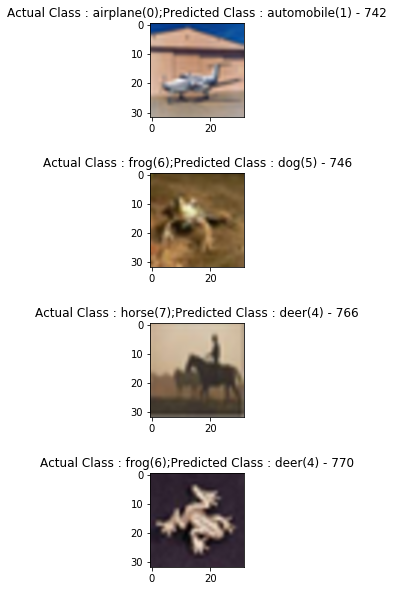

In [102]:
# Image gallery of 4 misclassified images from the validation dataset

import numpy as np


fig=plt.figure(figsize=(10, 10))
columns = 1
rows = 4
for i in range(1, columns*rows + 1):
    idx = mc_idx[i-1 + 80]
    img = test_features.reshape(test_features.shape[0], 32, 32, 3)[idx]
    fig.add_subplot(rows, columns, i)
    fig.subplots_adjust(hspace=0.6, wspace=0.3)
    #plt.title('%d'%prediction_labels[idx])
    #plt.title('%s'%class_names[prediction_labels[idx]])
    plt.title("Actual Class : {}({});Predicted Class : {}({}) - {}".format(class_names[actual_labels[idx]], actual_labels[idx], class_names[prediction_labels[idx]], prediction_labels[idx], idx))
    #ax.set_title(class_names[prediction_labels[idx]])
    plt.imshow(img,interpolation = 'spline16')
plt.show()

### Integration of GRAD CAM

* http://www.hackevolve.com/where-cnn-is-looking-grad-cam/

In [0]:
# Import numpy, cv2, sys, Keras image and backend
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

10000
(32, 32, 3)


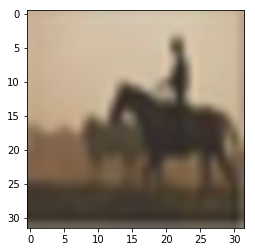

In [39]:
# Display image from the test dataset whose index is 423. Also display shape information

img = test_features.reshape(test_features.shape[0], 32, 32, 3)[766]
print(test_features.shape[0])
print(img.shape)
plt.imshow(img,interpolation = 'spline16')

In [0]:
# Function to obtain class_output from the predictions. Model, features and indexes need to be passed as arguments.

def pred_class_info(model, features, idx):
      img = features.reshape(features.shape[0], 32, 32, 3)[idx]
      img = img.reshape(1, 32, 32, 3)
      preds = model.predict(img)
      class_idx = np.argmax(preds)
      class_output = model.output[:, class_idx]
      return img,class_output

# Obtain the last convolution layer from the model.

#last_conv_layer = saved_model.get_layer("conv2d_17")

In [0]:
# Function to obtain weighted features map. This takes class ouput, last convoultion layer, image and number of filters as arguments

def weighted_feature_map(model, class_output, last_conv_layer, img, filters):
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([img])

  for i in range(filters):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  return conv_layer_output_value


In [0]:
# Function to generate heatmap from pooled_gradient_values * conv_layer_output

def gen_heatmap(conv_layer_output_value):
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  return heatmap

In [0]:
last_conv_layer = saved_model.get_layer("conv2d_17")

In [83]:
print(last_conv_layer.output)

Tensor("conv2d_17_2/convolution:0", shape=(?, 8, 8, 256), dtype=float32)


In [0]:
img,class_output = pred_class_info(saved_model, test_features, 770)
last_conv_layer = saved_model.get_layer("conv2d_17")
conv_layer_output_value = weighted_feature_map(saved_model, class_output, last_conv_layer, img, 256)
heatmap = gen_heatmap(conv_layer_output_value)

In [0]:
# Function to obtain the gradient CAM(Class Activation Map). This takes mode, entire dataset of images, index of the image for which grad CAM is to be generated, layer name and number of filters in that layer

def grad_CAM(model, features, index, layer_nam, num_filters):
  img,class_output = pred_class_info(model, features, index)
  last_conv_layer = model.get_layer(layer_nam)
  
  conv_layer_output_value = weighted_feature_map(model, class_output, last_conv_layer, img, num_filters)
  heatmap = gen_heatmap(conv_layer_output_value)
    
  img = img.reshape(32, 32, 3)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap1 = np.uint8(255 * heatmap)
  heatmap2 = cv2.applyColorMap(heatmap1, cv2.COLORMAP_JET)
  heatmap3 = cv2.cvtColor(heatmap2,cv2.COLOR_BGR2RGB)
  img1 = np.uint8(255 * img)
  superimposed_img = cv2.addWeighted(img1, 0.6, heatmap3, 0.4, 0)
  return superimposed_img

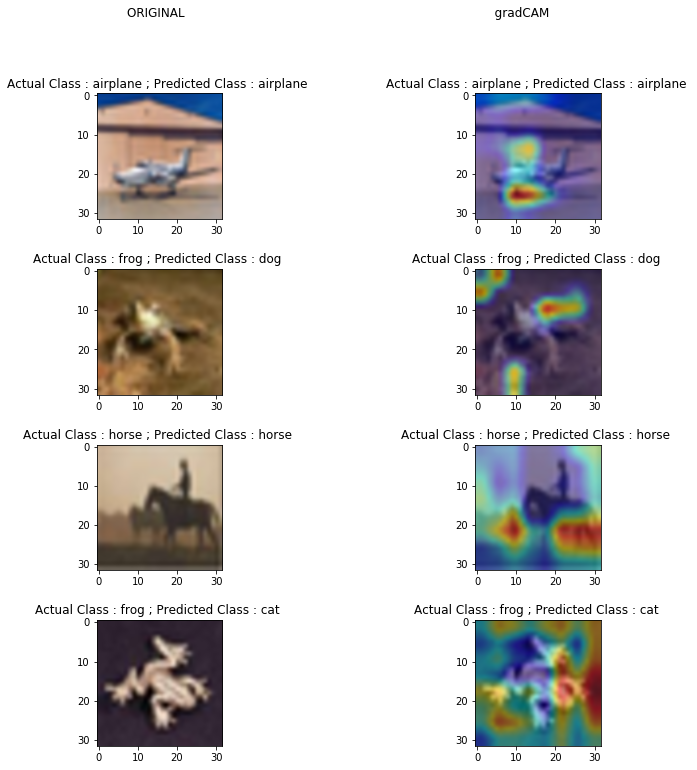

In [87]:

import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

idx_list = [742, 746, 766, 770]
fig=plt.figure(figsize=(12, 12))
spec = gridspec.GridSpec(ncols=2, nrows=4, figure=fig)
columns = 2
rows = 4
for i in range(rows):
  for j in range(columns):
    idx = idx_list[i] 
    img = test_features.reshape(test_features.shape[0], 32, 32, 3)[idx]
    fig.add_subplot(spec[i, j])
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    fig.suptitle("ORIGINAL                                                                                gradCAM")
    #plt.title('%d'%prediction_labels[idx])
    #plt.title('%s'%class_names[prediction_labels[idx]])
    plt.title("Actual Class : {} ; Predicted Class : {} ".format(class_names[actual_labels[idx]],  class_names[prediction_labels[idx]]))
    #ax.set_title(class_names[prediction_labels[idx]])
    if j == 0:
      plt.imshow(img,interpolation = 'spline16')
    else:
      gradCAM_img = grad_CAM(saved_model, test_features, idx, "conv2d_17", 256)
      plt.imshow(gradCAM_img,interpolation = 'spline16')      
plt.show()

### With Cutout / Random Erasing
* https://github.com/yu4u/cutout-random-erasing

In [5]:
# Import Cutout / Random Erasing implementation, especially for ImageDataGenerator in Keras from Github (https://github.com/yu4u/cutout-random-erasing)

!git clone https://github.com/yu4u/cutout-random-erasing ./random_eraser                                                   

import sys
sys.path.append("/content/random_eraser/")

Cloning into './random_eraser'...
remote: Enumerating objects: 23, done.
remote: Total 23 (delta 0), reused 0 (delta 0), pack-reused 23
Unpacking objects: 100% (23/23), done.


In [0]:
# Path to save the snapshots of the model with cutout-random-erasing

filepath_cutout ="/content/gdrive/My Drive/best_model_arch2_cutout_{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"

In [0]:
# Compiles the model i.e. specify loss, type of optimizer to use while training, metrics that needs to be calculated and displayed.

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 +  0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
# create a checkpoint to save the model when accuracy improves

from keras.callbacks import *
checkpoint = ModelCheckpoint(filepath_cutout, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [LearningRateScheduler(scheduler, verbose=1), checkpoint]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=195, epochs=80)`
W0628 08:52:47.737323 139849773148032 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future

Epoch 1/80

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
195/195 [==============================] - 106s 545ms/step - loss: 15.0047 - acc: 0.1035 - val_loss: 8.5482 - val_acc: 0.1316

Epoch 00001: val_acc improved from -inf to 0.13160, saving model to /content/gdrive/My Drive/best_model_arch2_cutout_001-val_acc:0.132.hdf5
Epoch 2/80

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
195/195 [==============================] - 97s 498ms/step - loss: 6.5897 - acc: 0.1972 - val_loss: 4.6187 - val_acc: 0.1000

Epoch 00002: val_acc did not improve from 0.13160
Epoch 3/80

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
195/195 [==============================] - 96s 490ms/step - loss: 3.4413 - acc: 0.3116 - val_loss: 3.3755 - val_acc: 0.1000

Epoch 00003: val_acc did not improve from 0.13160
Epoch 4/80

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
195/195 [==============================] - 96s

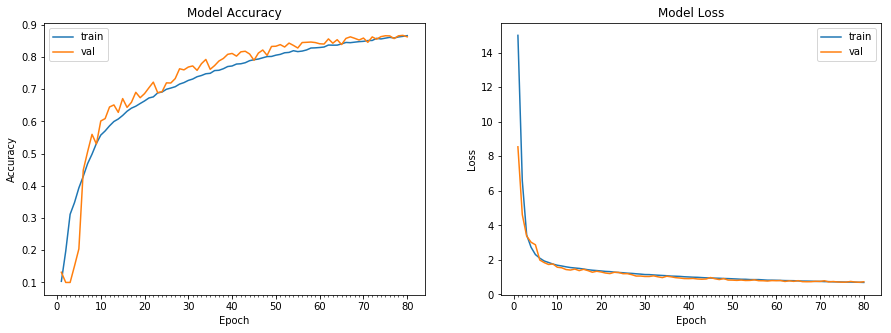

Accuracy on test data is: 86.29


In [20]:
# Train the model using fit_generator function. Also calculate and display total time taken for training. Along with this plot summarize history for accuracy and loss. Display accuracy on validation dataset.
# Perform cutout-random-erasing in ImageDataGenerator
# [1] T. DeVries and G. W. Taylor, "Improved Regularization of Convolutional Neural Networks with Cutout," in arXiv:1708.04552, 2017
# [2] Z. Zhong, L. Zheng, G. Kang, S. Li, and Y. Yang, "Random Erasing Data Augmentation," in arXiv:1708.04896, 2017.

from keras.preprocessing.image import ImageDataGenerator
from math import ceil
from random_eraser import get_random_eraser

#datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zoom_range=0.0, horizontal_flip=False)

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False, preprocessing_function=get_random_eraser(v_l=0, v_h=1))

#datagen.fit(train_features)

#validation_steps = ceil(len(test_features)/ 128)


# train the model
start = time.time()
# Train the model
# model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
#                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
#                                 validation_data = datagen.flow(test_features, test_labels, batch_size= 128, shuffle = False), validation_steps=validation_steps, verbose=1)

model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks = callbacks_list)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

*   Validation accuracy for best model is 86.75
*   Validation accuracy at the last epoch is 86.29

* Best saved model : /content/gdrive/My Drive/best_model_arch2_cutout_079-val_acc:0.868.hdf5

In [0]:
# Load the best saved model after using cutout

from keras.models import load_model
saved_model_cutout = load_model('/content/gdrive/My Drive/best_model_arch2_cutout_079-val_acc:0.868.hdf5')

In [0]:
y_pred_cutout = saved_model_cutout.predict(test_features)
prediction_labels_cutout = np.argmax(y_pred_cutout, axis = -1)

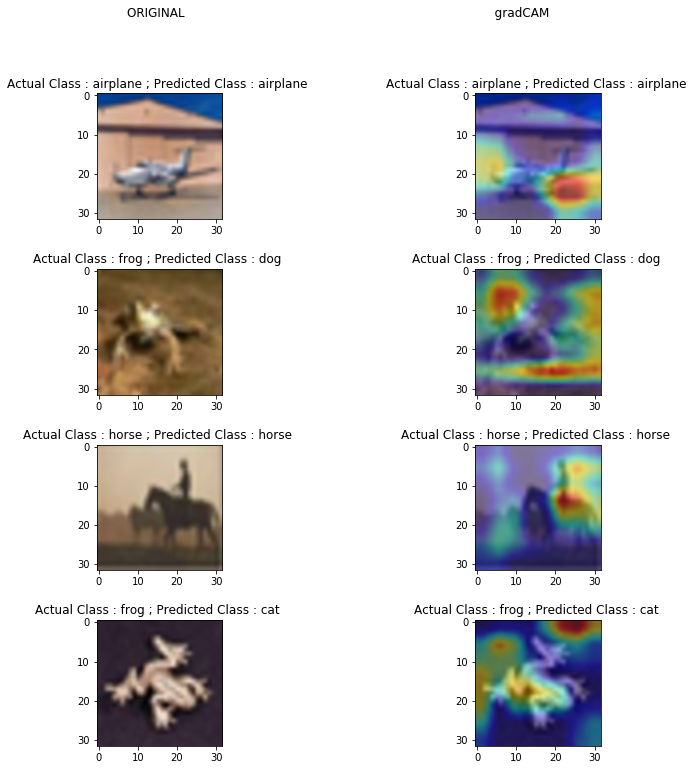

In [92]:
# Import numpy, cv2, sys, Keras image and backend
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

idx_list = [742, 746, 766, 770]
fig=plt.figure(figsize=(12, 12))
spec = gridspec.GridSpec(ncols=2, nrows=4, figure=fig)
columns = 2
rows = 4
for i in range(rows):
  for j in range(columns):
    idx = idx_list[i] 
    img = test_features.reshape(test_features.shape[0], 32, 32, 3)[idx]
    fig.add_subplot(spec[i, j])
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    fig.suptitle("ORIGINAL                                                                                gradCAM")
    #plt.title('%d'%prediction_labels[idx])
    #plt.title('%s'%class_names[prediction_labels[idx]])
    plt.title("Actual Class : {} ; Predicted Class : {} ".format(class_names[actual_labels[idx]],  class_names[prediction_labels_cutout[idx]]))
    #ax.set_title(class_names[prediction_labels[idx]])
    if j == 0:
      plt.imshow(img, interpolation = 'spline16')
    else:
      gradCAM_img_cutout = grad_CAM(saved_model_cutout, test_features, idx, "conv2d_17", 256)
      plt.imshow(gradCAM_img_cutout, interpolation = 'spline16')   
      pass
plt.show()


### GRAD CAM Gallery - Displays Original Images, GradGAM (With & Without CutOut)



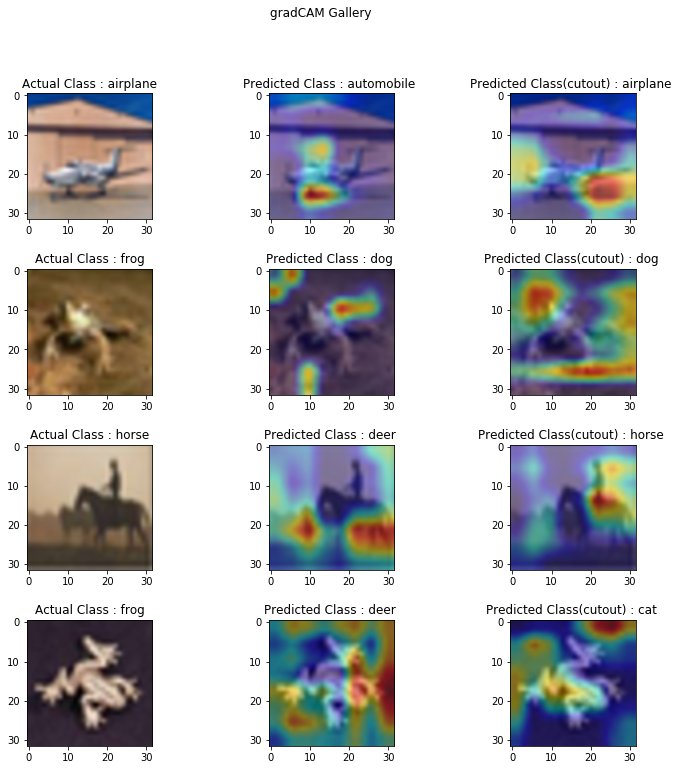

In [117]:
# Import numpy, cv2, sys, matplotlib, Keras image and backend
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

idx_list = [742, 746, 766, 770]
fig=plt.figure(figsize=(12, 12))
spec = gridspec.GridSpec(ncols=3, nrows=4, figure=fig)
columns = 3
rows = 4
for i in range(rows):
  for j in range(columns):
    idx = idx_list[i] 
    img = test_features.reshape(test_features.shape[0], 32, 32, 3)[idx]
    
    fig.add_subplot(spec[i, j])
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    fig.suptitle("gradCAM Gallery")
    #plt.title('%d'%prediction_labels[idx])
    #plt.title('%s'%class_names[prediction_labels[idx]])
    
    #ax.set_title(class_names[prediction_labels[idx]])
    if j == 0:
      plt.title("Actual Class : {}".format(class_names[actual_labels[idx]]))
      plt.imshow(img, interpolation = 'spline16')
    elif j == 1:
      plt.title("Predicted Class : {} ".format(class_names[prediction_labels[idx]]))
      gradCAM_img = grad_CAM(saved_model, test_features, idx, "conv2d_17", 256)
      plt.imshow(gradCAM_img, interpolation = 'spline16')
    else:
      plt.title("Predicted Class(cutout) : {} ".format(class_names[prediction_labels_cutout[idx]]))
      gradCAM_img_cutout = grad_CAM(saved_model_cutout, test_features, idx, "conv2d_17", 256)
      plt.imshow(gradCAM_img_cutout, interpolation = 'spline16')   
plt.show()

### Conclusion

* After CutOut the CNN is trying to look at more relevant parts of the Image for classification. This is evident from the *Gradient-weighted Class Activation Maps (Grad-CAM)* as shown above.

### **References & Attributions:**

* http://www.hackevolve.com/where-cnn-is-looking-grad-cam/
* https://github.com/yu4u/cutout-random-erasing
* Keras (https://keras.io/)
* Tensorflow 2.1 (https://www.tensorflow.org/api_docs/python/)
* T. DeVries and G. W. Taylor, "Improved Regularization of Convolutional Neural Networks with Cutout," in arXiv:1708.04552, 2017.
* Z. Zhong, L. Zheng, G. Kang, S. Li, and Y. Yang, "Random Erasing Data Augmentation," in arXiv:1708.04896, 2017.

*Disclaimer: The contents of this notebook are used for educational purposes i.e. for learning and research.*